# Skin Detection
## Bianchi Luca (4805748)

In [337]:
import os
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import cv2 as cv


In [338]:
def normalized(rgb):

        norm=np.zeros_like(rgb,np.float32)

        r = rgb[:, :, 0]
        g = rgb[:, :, 1]
        b = rgb[:, :, 2]
        sum=rgb.sum(axis=2)

        norm[:,:,0]=r/sum
        norm[:,:,1]=g/sum
        norm[:,:,2]=b/sum
        return norm

In [339]:
outputs = []
FILE_DIR = './material/images'

In [340]:
'''
with os.scandir(FILE_DIR+"/skin/") as direct:
    for file in direct:
        plt.figure(figsize=(32, 8))
        plt.suptitle(file.name)
        skin_img = io.imread(FILE_DIR + "/skin/" + file.name)
        skin_img_array = normalized(np.asarray(skin_img))
        plt.subplot(1, 9, 1)
        plt.imshow(skin_img_array)
        plt.subplot(1, 9, 2)
        plt.scatter(skin_img_array[:, :, 0], skin_img_array[:, :, 1], norm=True)
        plt.subplot(1, 9, 3)
        plt.scatter(skin_img_array[:, :, 0], skin_img_array[:, :, 2], norm=True)
        plt.subplot(1, 9, 4)
        plt.scatter(skin_img_array[:, :, 1], skin_img_array[:, :, 2], norm=True)
        plt.subplot(1, 9, 5)
        plt.imshow(skin_img)
        plt.subplot(1, 9, (6, 7))
        plt.plot((skin_img_array[:, :, 0]/skin_img_array[:, :, 1]).sum(axis=1)/skin_img_array.shape[0])
        plt.subplot(1, 9, (8, 9))
        plt.plot((skin_img_array[:, :, 0]/skin_img_array[:, :, 2]).sum(axis=1)/skin_img_array.shape[0])
'''

'\nwith os.scandir(FILE_DIR+"/skin/") as direct:\n    for file in direct:\n        plt.figure(figsize=(32, 8))\n        plt.suptitle(file.name)\n        skin_img = io.imread(FILE_DIR + "/skin/" + file.name)\n        skin_img_array = normalized(np.asarray(skin_img))\n        plt.subplot(1, 9, 1)\n        plt.imshow(skin_img_array)\n        plt.subplot(1, 9, 2)\n        plt.scatter(skin_img_array[:, :, 0], skin_img_array[:, :, 1], norm=True)\n        plt.subplot(1, 9, 3)\n        plt.scatter(skin_img_array[:, :, 0], skin_img_array[:, :, 2], norm=True)\n        plt.subplot(1, 9, 4)\n        plt.scatter(skin_img_array[:, :, 1], skin_img_array[:, :, 2], norm=True)\n        plt.subplot(1, 9, 5)\n        plt.imshow(skin_img)\n        plt.subplot(1, 9, (6, 7))\n        plt.plot((skin_img_array[:, :, 0]/skin_img_array[:, :, 1]).sum(axis=1)/skin_img_array.shape[0])\n        plt.subplot(1, 9, (8, 9))\n        plt.plot((skin_img_array[:, :, 0]/skin_img_array[:, :, 2]).sum(axis=1)/skin_img_array.sh

<ipython-input-338-bbbac1a9c96b>:10: RuntimeWarning: invalid value encountered in true_divide
  norm[:,:,0]=r/sum
<ipython-input-338-bbbac1a9c96b>:11: RuntimeWarning: invalid value encountered in true_divide
  norm[:,:,1]=g/sum
<ipython-input-338-bbbac1a9c96b>:12: RuntimeWarning: invalid value encountered in true_divide
  norm[:,:,2]=b/sum
<ipython-input-341-c9b2e96d0c36>:11: RuntimeWarning: divide by zero encountered in true_divide
  mask_rg = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,1], 1, 100)
<ipython-input-341-c9b2e96d0c36>:12: RuntimeWarning: divide by zero encountered in true_divide
  mask_rb = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,2], 1, 100)


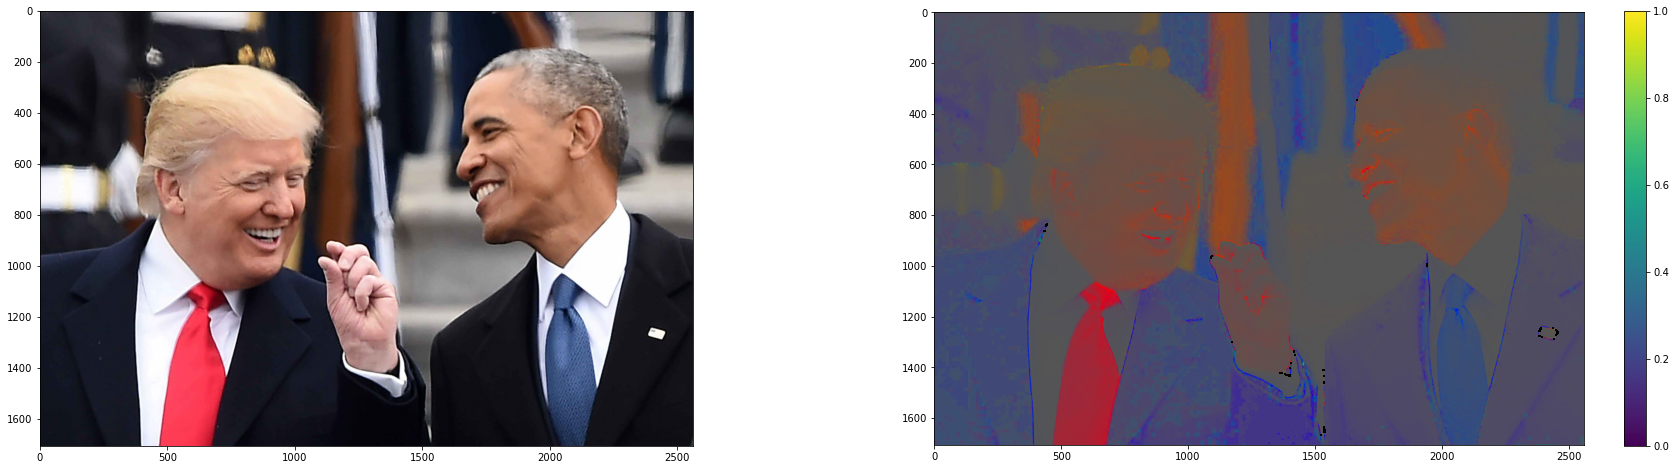

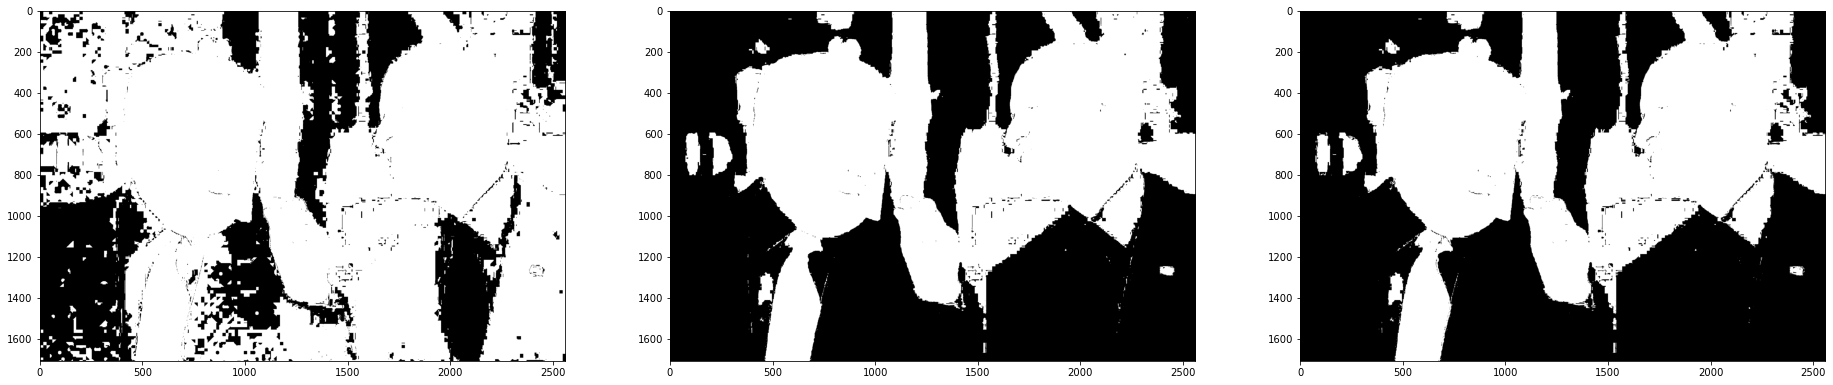

In [341]:
img = io.imread(FILE_DIR + "/trumpObama.jpg")
img_array = np.asarray(img)
#img_array = img_array[200:400, 300:700, :]
img_array_norm = normalized(img_array)
plt.figure(figsize=(32, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.subplot(1, 2, 2)
plt.imshow(img_array_norm)
plt.colorbar(orientation="vertical")
mask_rg = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,1], 1, 100)
mask_rb = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,2], 1, 100)
mask_norm = mask_rg & mask_rb
plt.figure(figsize=(32, 8))
plt.subplot(1, 3, 1)
plt.imshow(mask_rg, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(mask_rb, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(mask_norm, cmap='gray')


Proviamo a prendere come sample Channel 1 (G) / Channel 0 (R), da cui
riusciamo a ottenere una distinzione abbastanza pulita e uniforme degli elementi
di pelle, quindi correggiamone gli artefati e visualizziamola


Ma siccome i risultati sono troppo sporchi, lasciamoli qui, per ora

### HSB

In [342]:
'''
with os.scandir(FILE_DIR+"/skin/") as direct:
    for file in direct:
        plt.figure(figsize=(32, 4))
        plt.suptitle(file.name)
        skin_img = io.imread(FILE_DIR + "/skin/" + file.name)
        norm = normalized(skin_img)
        skin_img_hsb = cv.cvtColor(norm, cv.COLOR_BGR2HSV)
        plt.subplot(1, 2, 1)
        plt.imshow(norm)
        plt.subplot(1, 2, 2)
        plt.imshow(skin_img)
        plt.figure(figsize=(32, 8))
        plt.subplot(1, 7, 1)
        plt.imshow(skin_img_hsb[:, :, 0], cmap="hsv")
        plt.colorbar(orientation='horizontal')
        plt.subplot(1, 7, 2)
        plt.imshow(skin_img_hsb[:, :, 1], cmap="Reds")
        plt.colorbar(orientation='horizontal')
        plt.subplot(1, 7, 3)
        plt.imshow(skin_img_hsb[:, :, 2], cmap="gray")
        plt.colorbar(orientation='horizontal')
        plt.subplot(1, 7, (4, 5))
        plt.plot((skin_img_hsb[:, :, 0]).sum(axis=1)/skin_img_hsb.shape[0])
        plt.subplot(1, 7, (6, 7))
        plt.plot((skin_img_hsb[:, :, 1]).sum(axis=1)/skin_img_hsb.shape[0])
'''

'\nwith os.scandir(FILE_DIR+"/skin/") as direct:\n    for file in direct:\n        plt.figure(figsize=(32, 4))\n        plt.suptitle(file.name)\n        skin_img = io.imread(FILE_DIR + "/skin/" + file.name)\n        norm = normalized(skin_img)\n        skin_img_hsb = cv.cvtColor(norm, cv.COLOR_BGR2HSV)\n        plt.subplot(1, 2, 1)\n        plt.imshow(norm)\n        plt.subplot(1, 2, 2)\n        plt.imshow(skin_img)\n        plt.figure(figsize=(32, 8))\n        plt.subplot(1, 7, 1)\n        plt.imshow(skin_img_hsb[:, :, 0], cmap="hsv")\n        plt.colorbar(orientation=\'horizontal\')\n        plt.subplot(1, 7, 2)\n        plt.imshow(skin_img_hsb[:, :, 1], cmap="Reds")\n        plt.colorbar(orientation=\'horizontal\')\n        plt.subplot(1, 7, 3)\n        plt.imshow(skin_img_hsb[:, :, 2], cmap="gray")\n        plt.colorbar(orientation=\'horizontal\')\n        plt.subplot(1, 7, (4, 5))\n        plt.plot((skin_img_hsb[:, :, 0]).sum(axis=1)/skin_img_hsb.shape[0])\n        plt.subplot(1, 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


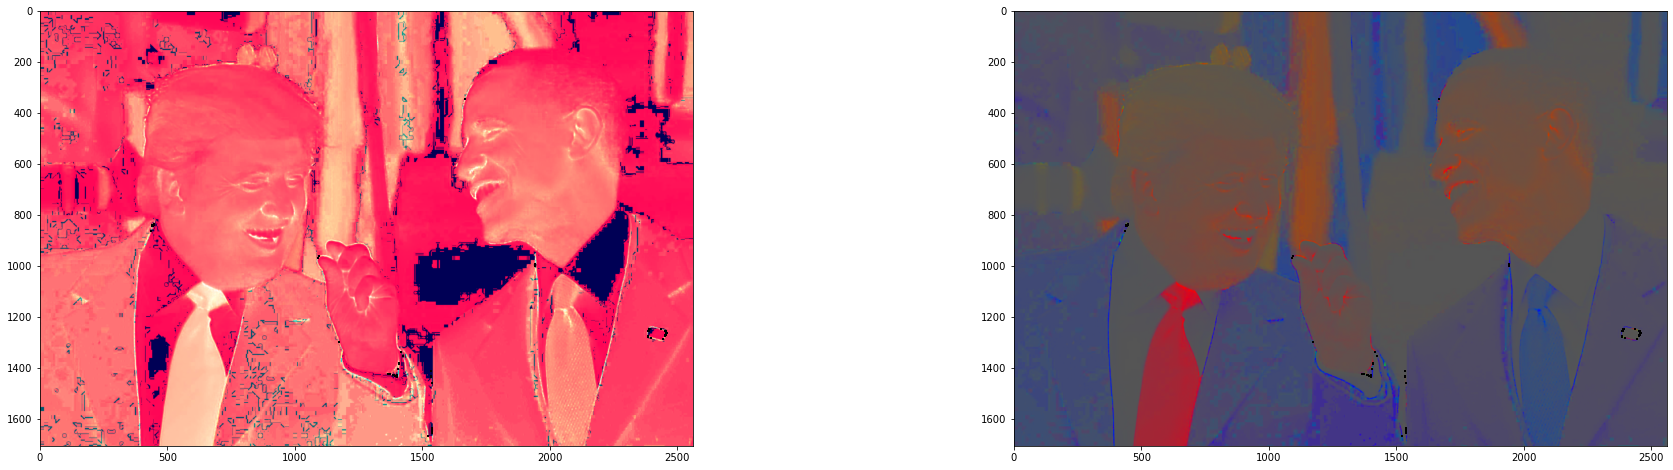

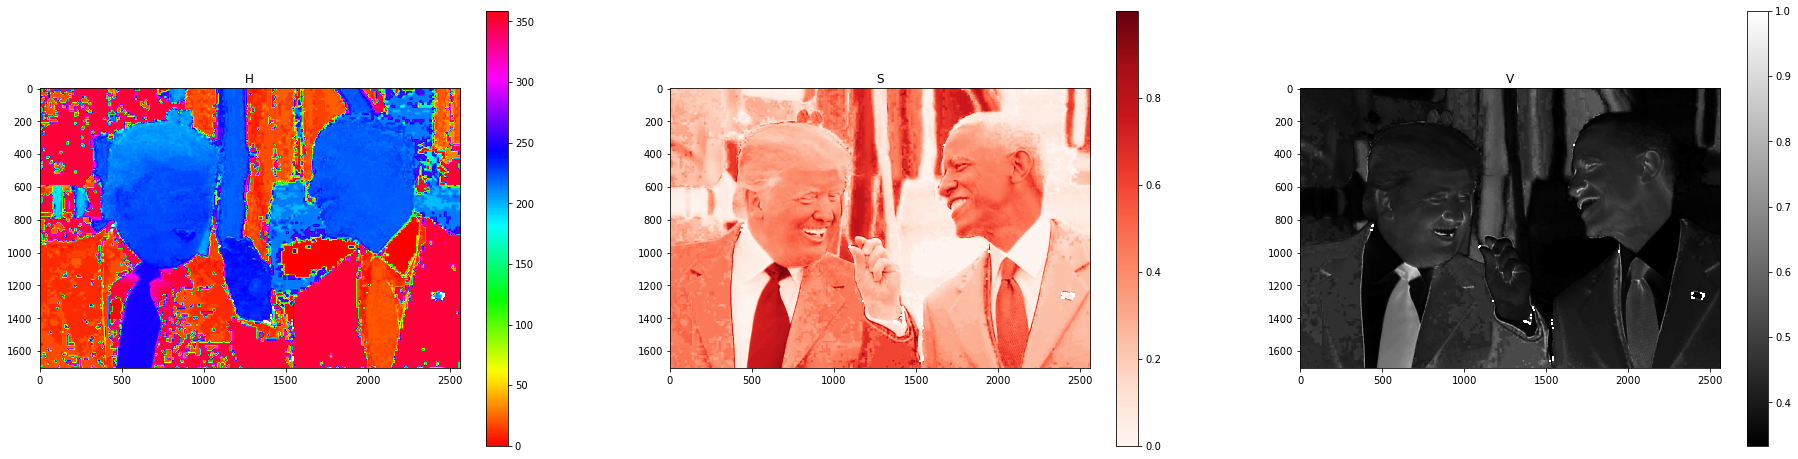

In [343]:
img_hsb = cv.cvtColor(img_array_norm, cv.COLOR_BGR2HSV)
label = ["H", "S", "V"]
cmaps = ["hsv", "Reds", "gray"]

plt.figure(figsize=(32, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_hsb, cmap='hsv')
plt.subplot(1, 2, 2)
plt.imshow(img_array_norm)


plt.figure(figsize=(32, 8))
for elem in range(img_hsb.shape[2]):
    plt.subplot(1, 3, elem + 1)
    plt.imshow(img_hsb[:, :, elem], cmap=cmaps[elem])
    plt.colorbar(orientation='vertical')
    plt.title(label[elem])

Filtriamo quindi per tenere i valori della mappa di colore tra 80 (verde) e
140 (blu)

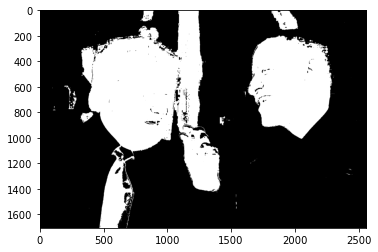

In [344]:
mask_hsv = cv.inRange(img_hsb[:,:,0], 200, 285) & cv.inRange(img_hsb[:, :, 1], 0.15, 0.8)
plt.imshow(mask_hsv, cmap="gray")

Sebbene ci sia un abbozzo di risultato, questo è...
Non ottimale, per così dire.

Proviamo quindi ad integrare questo metodo con altro

## YCrCb

In [345]:
'''with os.scandir(FILE_DIR+"/skin/") as direct:
    for file in direct:
        plt.figure(figsize=(32, 4))
        plt.suptitle(file.name)
        skin_img = io.imread(FILE_DIR + "/skin/" + file.name)
        norm = normalized(skin_img)
        skin_img_ycbcr = cv.cvtColor(norm, cv.COLOR_RGB2YCrCb)
        plt.subplot(1, 2, 1)
        plt.imshow(norm)
        plt.subplot(1, 2, 2)
        plt.imshow(skin_img)
        plt.figure(figsize=(32, 8))
        plt.subplot(1, 7, 1)
        plt.imshow(skin_img_ycbcr[:, :, 0], cmap="gray")
        plt.colorbar(orientation='horizontal')
        plt.subplot(1, 7, 2)
        plt.imshow(skin_img_ycbcr[:, :, 1], cmap="Greens")
        plt.colorbar(orientation='horizontal')
        plt.subplot(1, 7, 3)
        plt.imshow(skin_img_ycbcr[:, :, 2], cmap="Reds")
        plt.colorbar(orientation='horizontal')
        plt.subplot(1, 7, (4, 5))
        plt.plot((skin_img_ycbcr[:, :, 1]).sum(axis=1)/skin_img_hsb.shape[0])
        plt.subplot(1, 7, (6, 7))
        plt.plot((skin_img_ycbcr[:, :, 2]).sum(axis=1)/skin_img_hsb.shape[0])
'''

'with os.scandir(FILE_DIR+"/skin/") as direct:\n    for file in direct:\n        plt.figure(figsize=(32, 4))\n        plt.suptitle(file.name)\n        skin_img = io.imread(FILE_DIR + "/skin/" + file.name)\n        norm = normalized(skin_img)\n        skin_img_ycbcr = cv.cvtColor(norm, cv.COLOR_RGB2YCrCb)\n        plt.subplot(1, 2, 1)\n        plt.imshow(norm)\n        plt.subplot(1, 2, 2)\n        plt.imshow(skin_img)\n        plt.figure(figsize=(32, 8))\n        plt.subplot(1, 7, 1)\n        plt.imshow(skin_img_ycbcr[:, :, 0], cmap="gray")\n        plt.colorbar(orientation=\'horizontal\')\n        plt.subplot(1, 7, 2)\n        plt.imshow(skin_img_ycbcr[:, :, 1], cmap="Greens")\n        plt.colorbar(orientation=\'horizontal\')\n        plt.subplot(1, 7, 3)\n        plt.imshow(skin_img_ycbcr[:, :, 2], cmap="Reds")\n        plt.colorbar(orientation=\'horizontal\')\n        plt.subplot(1, 7, (4, 5))\n        plt.plot((skin_img_ycbcr[:, :, 1]).sum(axis=1)/skin_img_hsb.shape[0])\n        pl

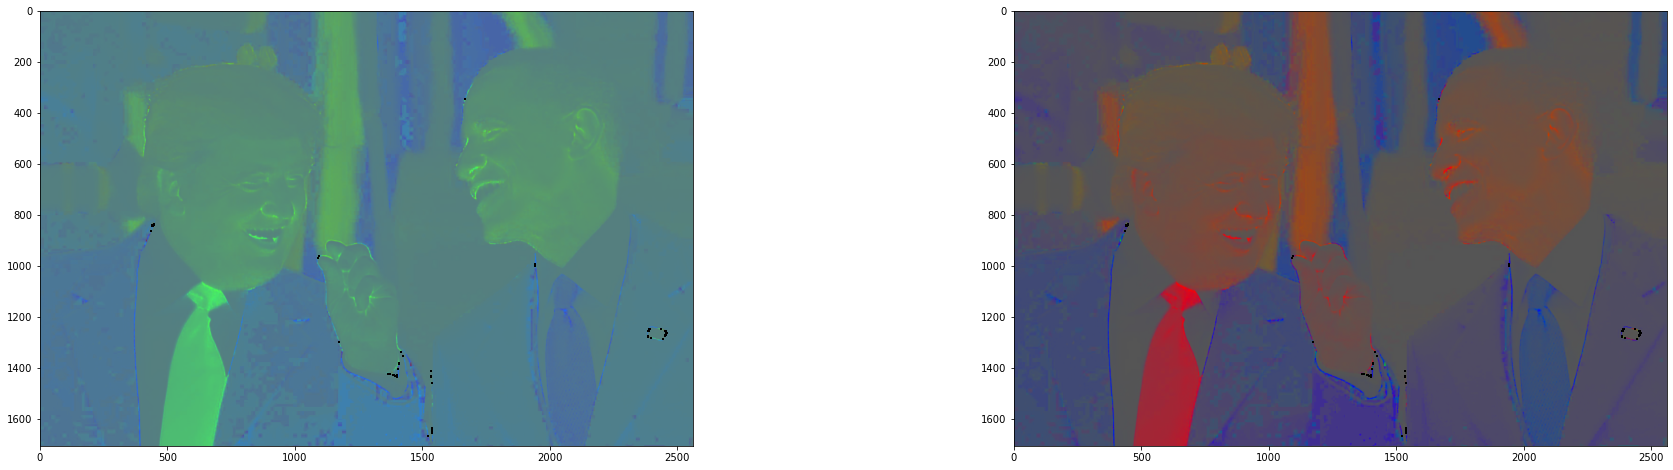

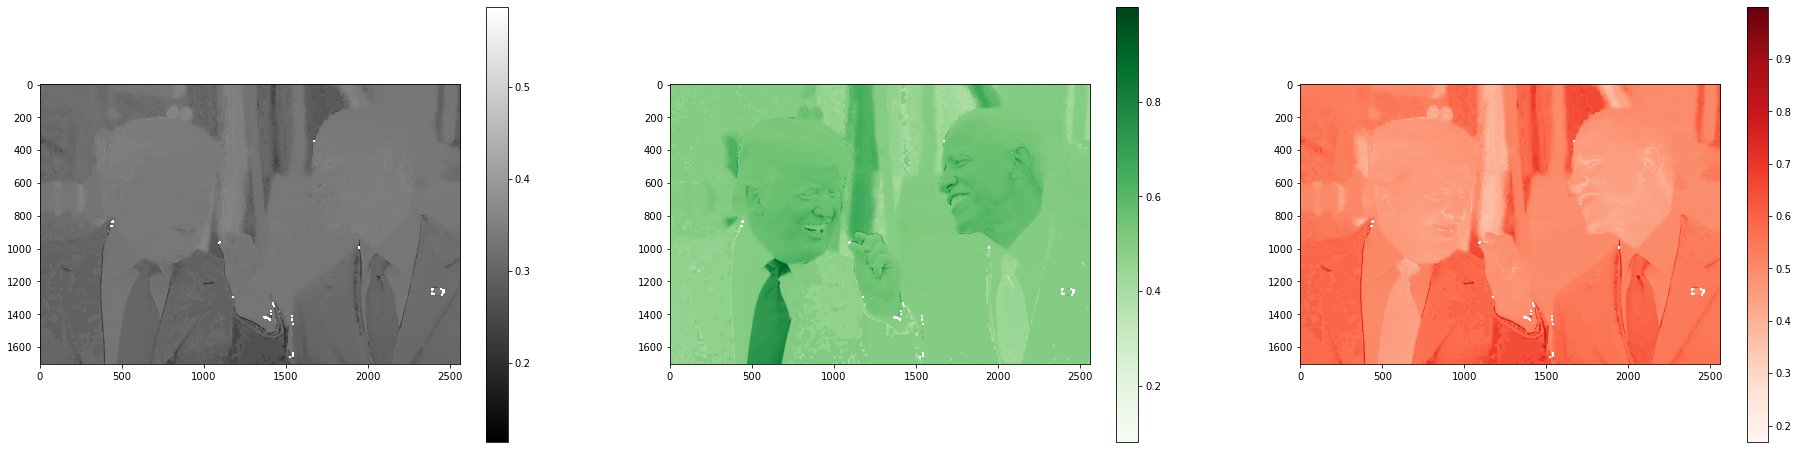

In [346]:
img_ycbcr = cv.cvtColor(img_array_norm, cv.COLOR_RGB2YCrCb)
label = ["Original", "Y", "Cb", "Cr"]
plt.figure(figsize=(32, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_ycbcr)
plt.subplot(1, 2, 2)
plt.imshow(img_array_norm)
plt.figure(figsize=(32, 8))
plt.subplot(1, 3, 1)
plt.imshow(img_ycbcr[:, : , 0], cmap='gray')
plt.colorbar(orientation='vertical')
plt.subplot(1, 3, 2)
plt.imshow(img_ycbcr[:, :, 1], cmap='Greens')
plt.colorbar(orientation='vertical')
plt.subplot(1, 3, 3)
plt.imshow(img_ycbcr[:, :, 2], cmap='Reds')
plt.colorbar(orientation='vertical')

Proviamo a filtrare sui canali Cr e Cb, dai quali possiamo estrarre ulteriore
informazione

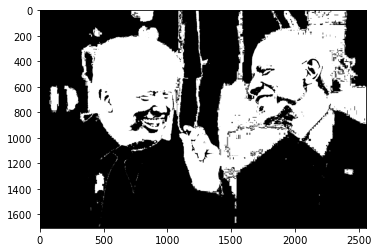

In [347]:
mask_ycrcb = cv.inRange(img_ycbcr[:, :, 1], 0.5, 0.6) & cv.inRange(img_ycbcr[:, :, 2], .35, .50)
plt.imshow(mask_ycrcb, cmap="gray")

Proviamo ora a combinare i tre filtri

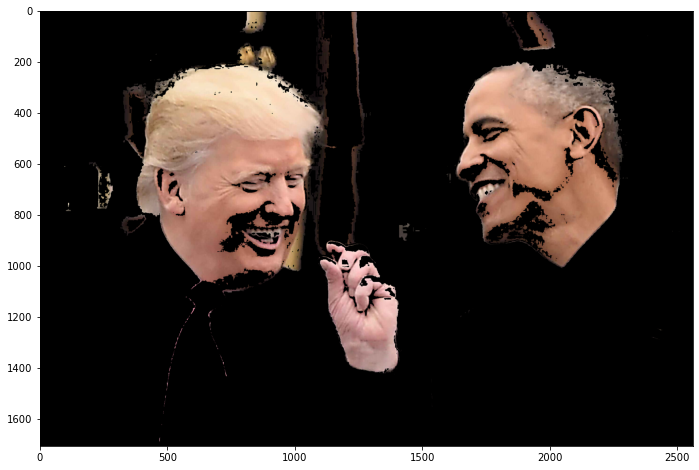

In [348]:
mask_combined = mask_norm & mask_hsv & mask_ycrcb
plt.figure(figsize=(32, 8))
plt.imshow(cv.bitwise_or(img_array, img_array, mask=mask_combined))